## SVM Classifier

### Import packages

In [1]:
from IPython.display import Image
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Overview of the SVM algorithm

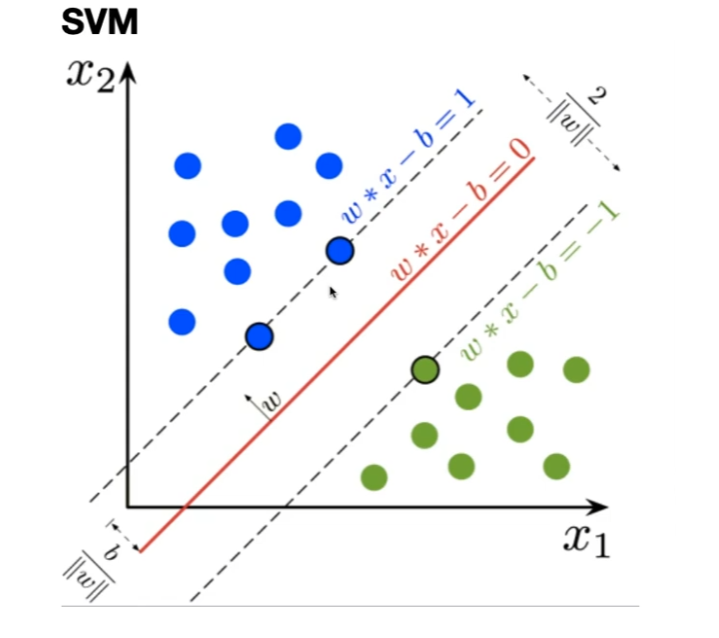

In [5]:
Image(filename='data/SVM.png')

### SVM Implementation using numpy

In [2]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


### Testing 

In [3]:
# get data
df = pd.read_csv('data/toy_Data.csv')
df.head()

,x,y,label
0,5.044807,-2.930179,1
1,-0.441786,-9.200440,-1
2,-1.272669,-8.031670,-1
3,-1.328688,-7.692737,-1
4,-2.179329,-9.867630,-1


In [4]:
x = df.drop(['label'],axis=1)
y = df.label

In [5]:
X = x.values
Y = y.values

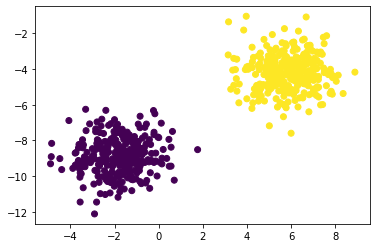

In [6]:
plt.scatter(X[:,0], X[:,1], marker="o", c=y)
plt.savefig('toy_Data.pdf', bbox_inches='tight')
plt.show()


In [21]:
clf = SVM()
clf.fit(X, Y)
# predictions = clf.predict(X)

print(clf.w, clf.b)


[0.49593543 0.23867352] -0.4930000000000004


In [19]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


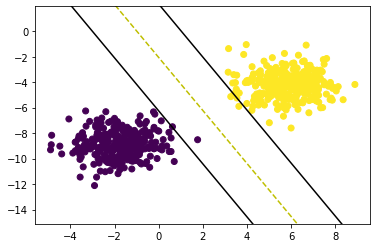

In [22]:
visualize_svm()

### Testing with sklearn

In [107]:
svm_clf = SVC(C=0.05,kernel='linear')
svm_clf.fit(X, Y)

SVC(C=0.05, kernel='linear')

In [98]:
def visualize_svm_sklearn():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm_clf.coef_[0], svm_clf.intercept_[0], 0)
    x1_2 = get_hyperplane_value(x0_2, svm_clf.coef_[0], svm_clf.intercept_[0], 0)

    x1_1_m = get_hyperplane_value(x0_1, svm_clf.coef_[0], svm_clf.intercept_[0], -1)
    x1_2_m = get_hyperplane_value(x0_2, svm_clf.coef_[0], svm_clf.intercept_[0], -1)

    x1_1_p = get_hyperplane_value(x0_1, svm_clf.coef_[0], svm_clf.intercept_[0], 1)
    x1_2_p = get_hyperplane_value(x0_2, svm_clf.coef_[0], svm_clf.intercept_[0], 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


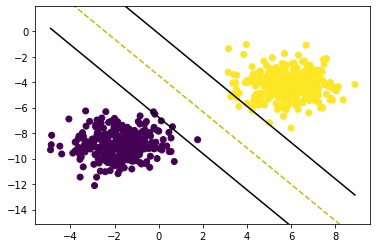

In [108]:
visualize_svm_sklearn()